In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]

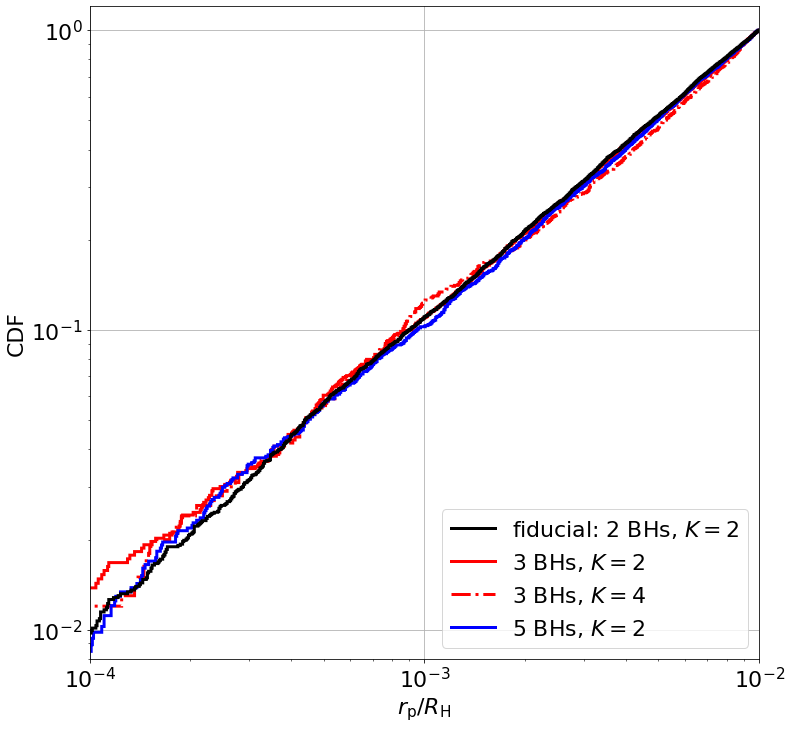

In [4]:
### 
##  Read the data for damping runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH

can_CE0 = limit_rc( np.load('../data/can_CE0-2000.npy'), rc)

p3k2 = np.load('../data/NBH3-2K.npy')
p3k4 = np.load('../data/NBH3-4K.npy')
p5k2 = np.load('../data/NBH5-2K.npy')
p5k4 = np.load('../data/NBH5-4K.npy')


##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$r_{\rm p}/R_{\rm H}$')
axs.set_ylabel(r'CDF')

axs.set_xlim([1e-4,1e-2])
axs.set_ylim([0.8e-2,1.2])

axs.set_xscale('log')
axs.set_yscale('log')

# parameters of the plot

bin_use = 10**np.linspace(-5,-1.5,1001)
aluse = .5
lw = 3



# plot the distribution of rp

eta = p3k2[:,3] * (1-p3k2[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='r',histtype='step')

eta = p3k4[:,3] * (1-p3k4[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='r',histtype='step',ls='-.')

eta = p5k2[:,3] * (1-p5k2[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='b',histtype='step')

#eta = p5k4[:,3] * (1-p5k4[:,4]) / RH
#Nuse = len(eta)
#axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
#         edgecolor='b',histtype='step',ls='-.')

eta = can_CE0[:,3] * (1-can_CE0[:,4]) / RH
Nuse = len(eta)
axs.hist(eta,bins=bin_use,linewidth=lw,density=True,cumulative=True,
         edgecolor='k',histtype='step')


##  Save the figure
axs.plot([],[],lw=lw,label=r'fiducial: 2 BHs, $K=2$',color='k')
axs.plot([],[],lw=lw,label=r'3 BHs, $K=2$',color='r')
axs.plot([],[],lw=lw,label=r'3 BHs, $K=4$',color='r',ls='-.')
axs.plot([],[],lw=lw,label=r'5 BHs, $K=2$',color='b')
#axs.plot([],[],lw=lw,label=r'5 BHs, initial $K=4$',color='b',ls='-.')
axs.legend(loc=4)
axs.grid()
axs.set_axisbelow(True)

plt.savefig('./pics/pics-CDF-rp-3p.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-CDF-rp-3p.png',bbox_inches='tight',transparent=True)


In [23]:
print(p3k4[:,0])

[34063.61508324 38620.83542895 19431.03114559 ... 44348.2864738
 17641.55964083 18720.05690695]


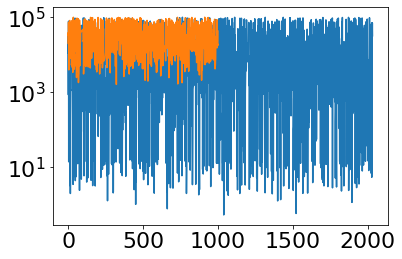

In [24]:
plt.semilogy(np.arange(len(p3k2[:,0])),p3k2[:,0])
plt.semilogy(np.arange(len(p3k4[:,0])),p3k4[:,0])